### Inferences would be :
1. How to imporve the students performance in each test ?
2. What are the major factors influencing the test scores ?
3. Effectiveness of test preparation course?
4. Other inferences

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

#### Reading data

In [2]:
data = pandas.read_csv("StudentsPerformance.csv", sep=",")

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# data types in the database

data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
data.describe(include="all")

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [6]:
# finding missing values in the data

data.isnull().value_counts()

# we have no missing values

gender  race/ethnicity  parental level of education  lunch  test preparation course  math score  reading score  writing score
False   False           False                        False  False                    False       False          False            1000
dtype: int64

#### Finding the relation between gender and test results

Text(0.5, 1.0, 'Types of Meal taken by Students')

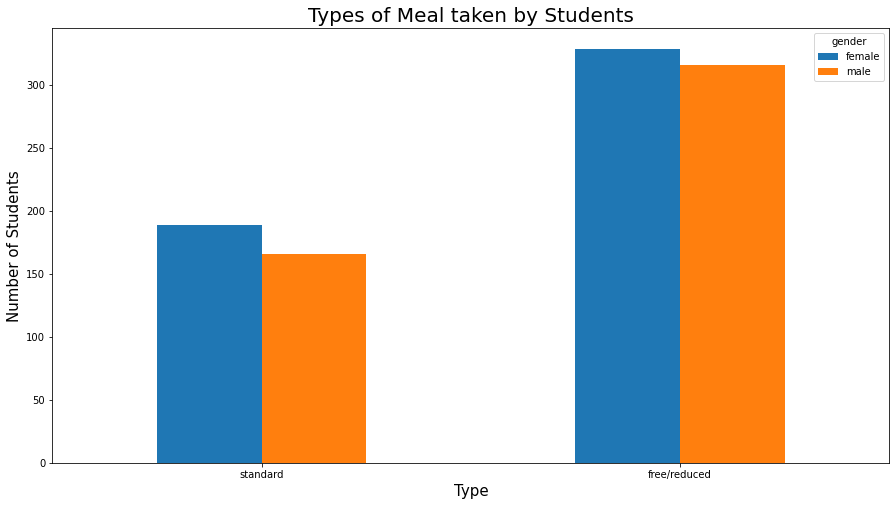

In [7]:
# how many boys and girls attend school which on different lunch schemes

data.groupby("gender")["lunch"].value_counts().unstack(level=0).plot.bar(figsize=(15, 8))
plt.xticks(numpy.arange(2), data["lunch"].unique(), rotation=0)
plt.xlabel("Type", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.title("Types of Meal taken by Students", fontsize=20)

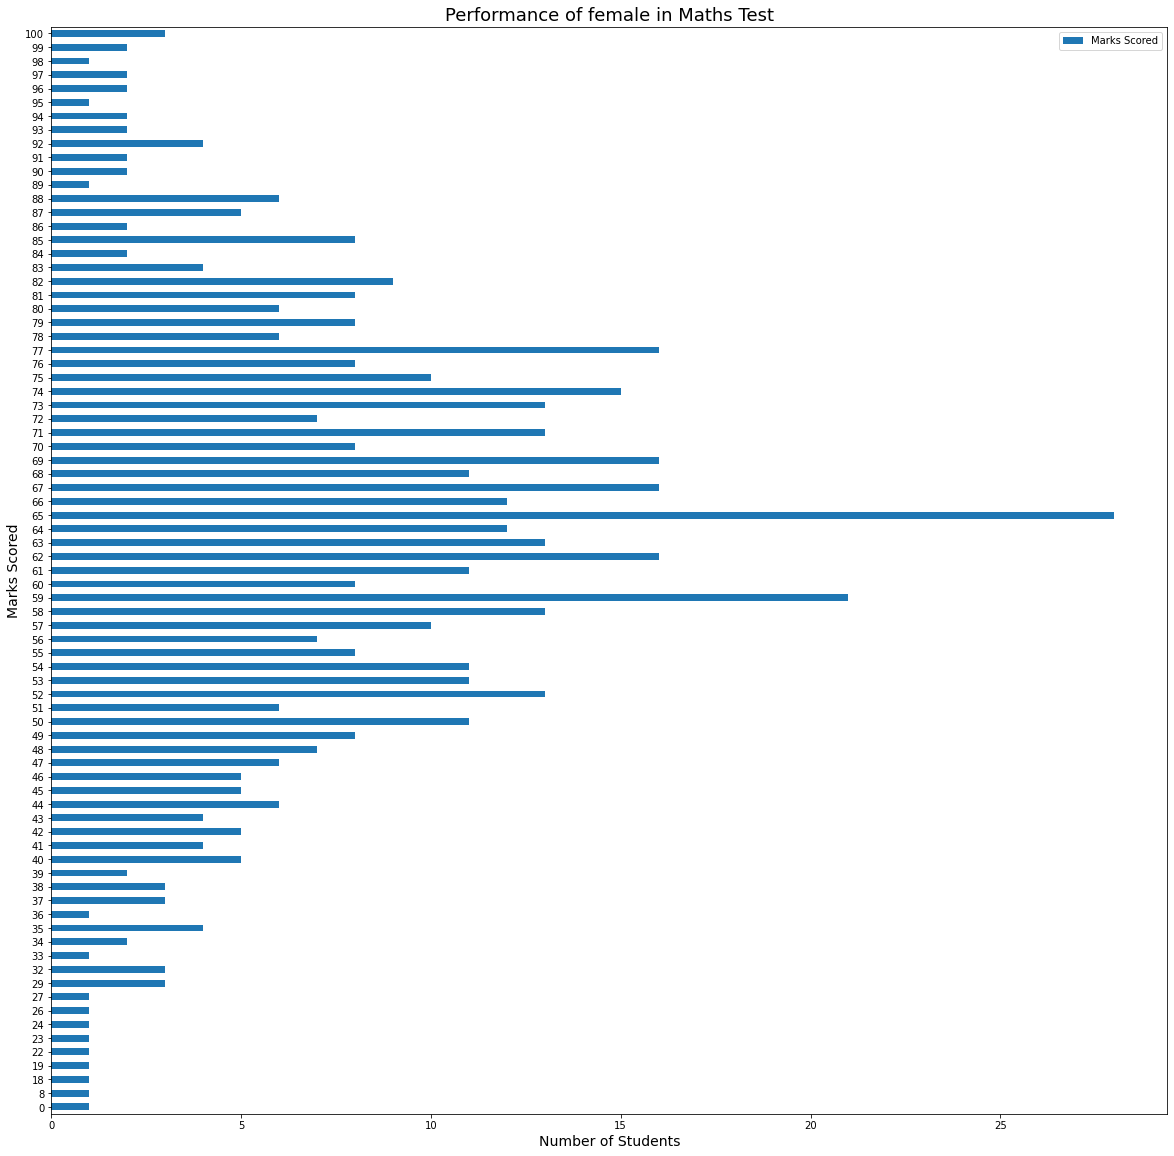

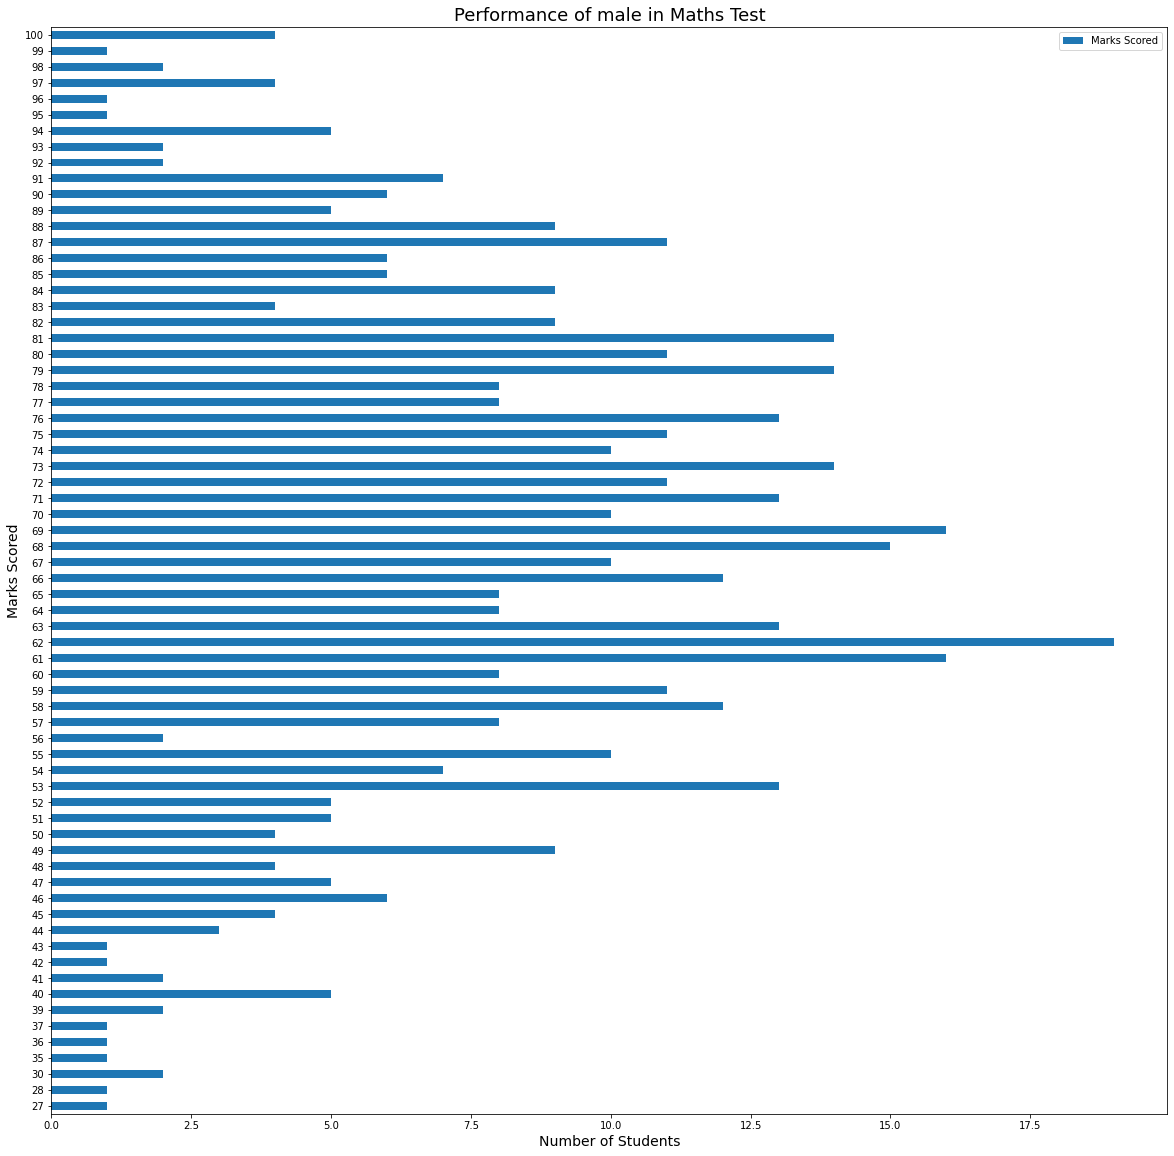

In [8]:
for gen in data["gender"].unique():
    plt.figure(figsize=(20, 20))
    data[data["gender"] == gen]["math score"].value_counts().sort_index().plot.barh()
    plt.xlabel("Number of Students", fontsize = 14)
    plt.ylabel("Marks Scored", fontsize = 14)
    plt.title(f"Performance of {gen} in Maths Test", fontsize=18)
    plt.legend(["Marks Scored"],loc="best")

#### Feature Engineering

In [9]:
data["total"] = data["math score"] + data["reading score"] + data["writing score"]

In [10]:
data["total"].describe()

count    1000.000000
mean      203.312000
std        42.771978
min        27.000000
25%       175.000000
50%       205.000000
75%       233.000000
max       300.000000
Name: total, dtype: float64

Text(0, 0.5, 'Number of students')

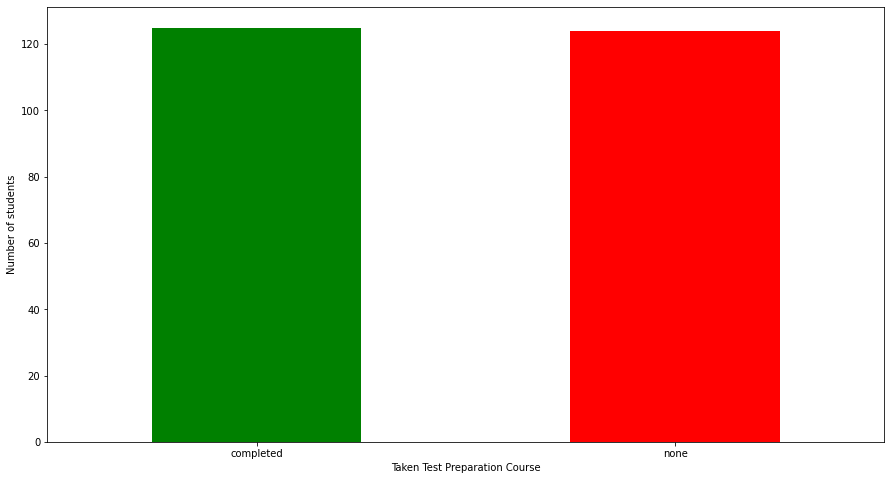

In [11]:
# finding how many students scored above 233 total marks who took test preparation course

plt.figure(figsize=(15, 8))
data[data["total"] > 233]["test preparation course"].value_counts().plot.bar(color=["green", "red"])
plt.xticks(rotation=0)
plt.xlabel("Taken Test Preparation Course")
plt.ylabel("Number of students")

gender  test preparation course
female  none                       78
        completed                  67
male    completed                  58
        none                       46
Name: test preparation course, dtype: int64

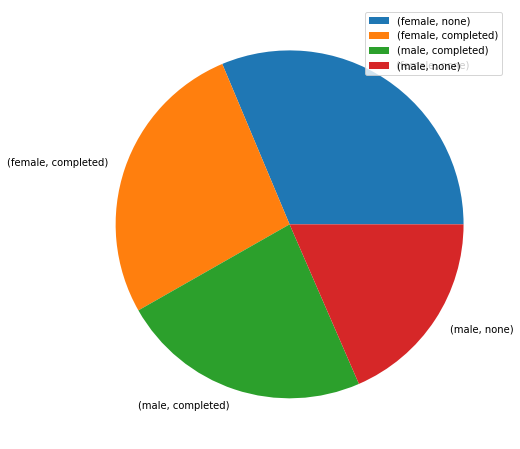

In [12]:
# Number of girls and boys scored more than 233 (75%) and taken test preparation course
sum_ = data[data["total"]>233]
plt.figure(figsize=(10, 8))
sum_.groupby("gender")["test preparation course"].value_counts().plot.pie(subplots=True, legend = "index")
plt.xticks(color="white")
plt.ylabel(None)

sum_.groupby("gender")["test preparation course"].value_counts()


<AxesSubplot:xlabel='reading score', ylabel='writing score'>

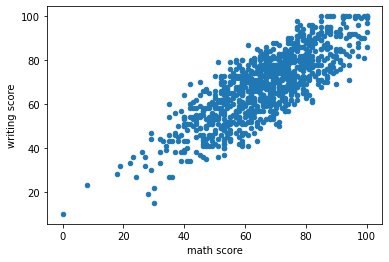

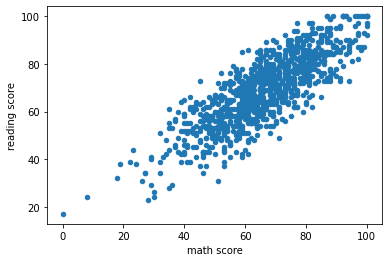

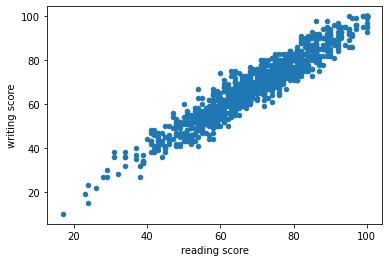

In [13]:
data.plot.scatter(x="math score", y="writing score")
data.plot.scatter(x="math score", y="reading score")
data.plot.scatter(x="reading score", y="writing score")

### The result shows that all three scores are **collinear** to each other

### Performing EDA specifically on Reading, Writing and Math Scores

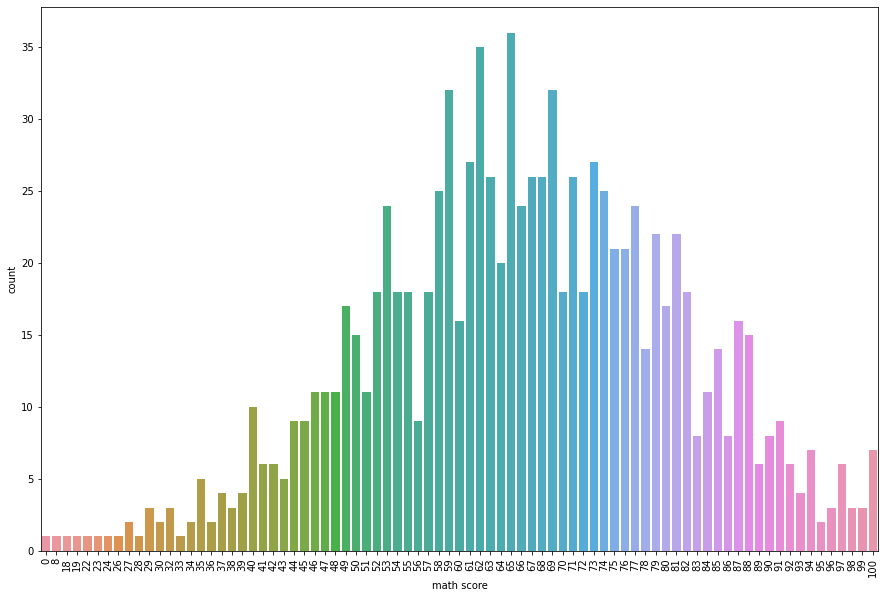

In [14]:
plt.figure(figsize=(15, 10))
p = sns.countplot(x="math score", data = data)
_ = plt.xticks(rotation = 90)


In [15]:
data["Math_PassStatus"] = numpy.where(data["math score"] < 40, "F", "P")
data["Math_PassStatus"].value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

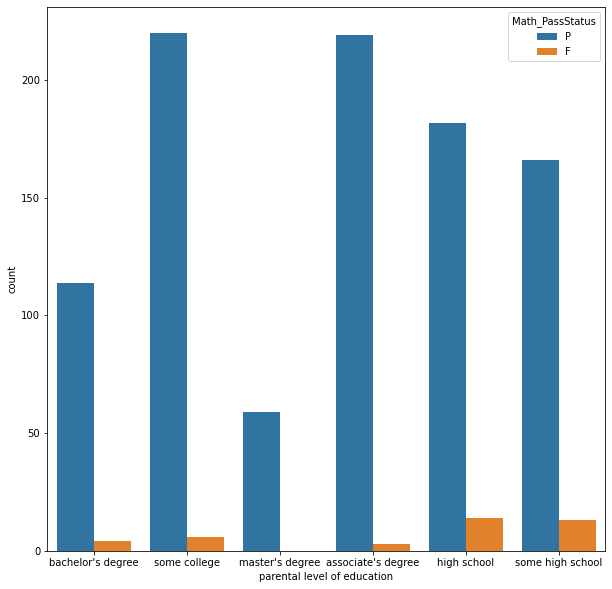

In [16]:
# determining the parental education in relation with math score

plt.figure(figsize=(10, 10))
p = sns.countplot(x="parental level of education", data=data, hue="Math_PassStatus")

In [17]:
# how many student took test preparation course and got how many number

data["Reading_Overall"] = numpy.where(data["reading score"] < 40, "F", "P")
data["Writing_Overall"] = numpy.where(data["writing score"] < 40, "F", "P")

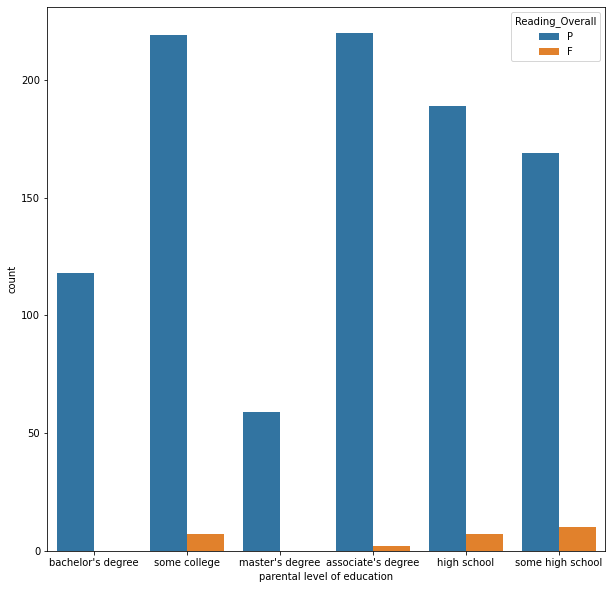

In [18]:

plt.figure(figsize=(10, 10))
p = sns.countplot(x="parental level of education", data=data, hue="Reading_Overall")

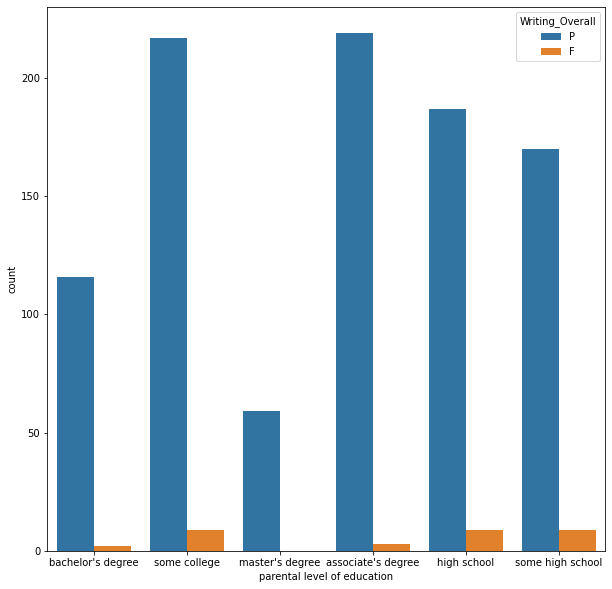

In [19]:

plt.figure(figsize=(10, 10))
p = sns.countplot(x="parental level of education", data=data, hue="Writing_Overall")

In [20]:
data["Overall_PassStatus"] = data.apply(lambda x:"F" if x["Math_PassStatus"] == "F" or x["Reading_Overall"] == "F" or x["Writing_Overall"] == "F" else "P", axis=1) 

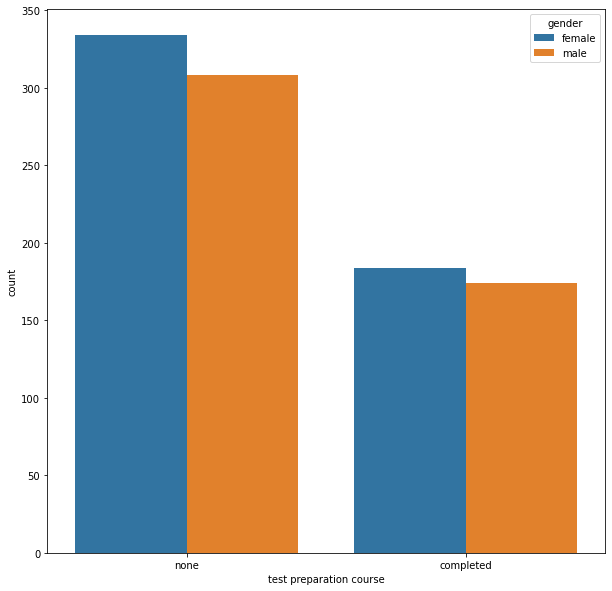

In [21]:
plt.figure(figsize=(10, 10))
p = sns.countplot(x="test preparation course", data=data, hue="gender")

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

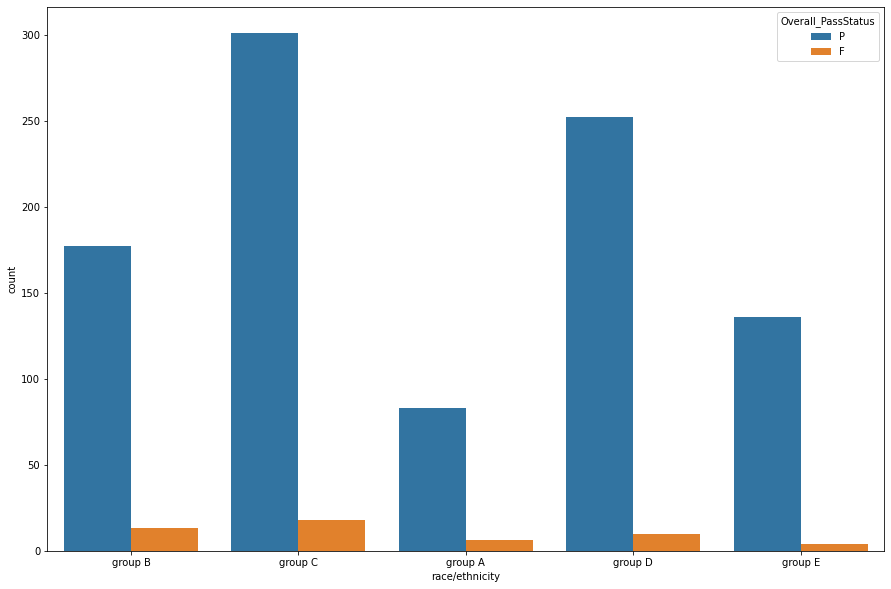

In [22]:
plt.figure(figsize=(15, 10))
sns.countplot(x="race/ethnicity", data=data, hue="Overall_PassStatus")

#### Finding race wise aggregate of total score

In [23]:
data["total"] = data[["math score", "reading score", "writing score"]].sum(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,Math_PassStatus,Reading_Overall,Writing_Overall,Overall_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P


In [24]:
# changing the name of complex headings

data_new = data.rename(columns={"race/ethnicity": "race", "parental level of education": "parents edu", "test preparation course": "prepare"}, inplace=False)
data_new.head()


,gender,race,parents edu,lunch,prepare,math score,reading score,writing score,total,Math_PassStatus,Reading_Overall,Writing_Overall,Overall_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P,P,P,P
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P


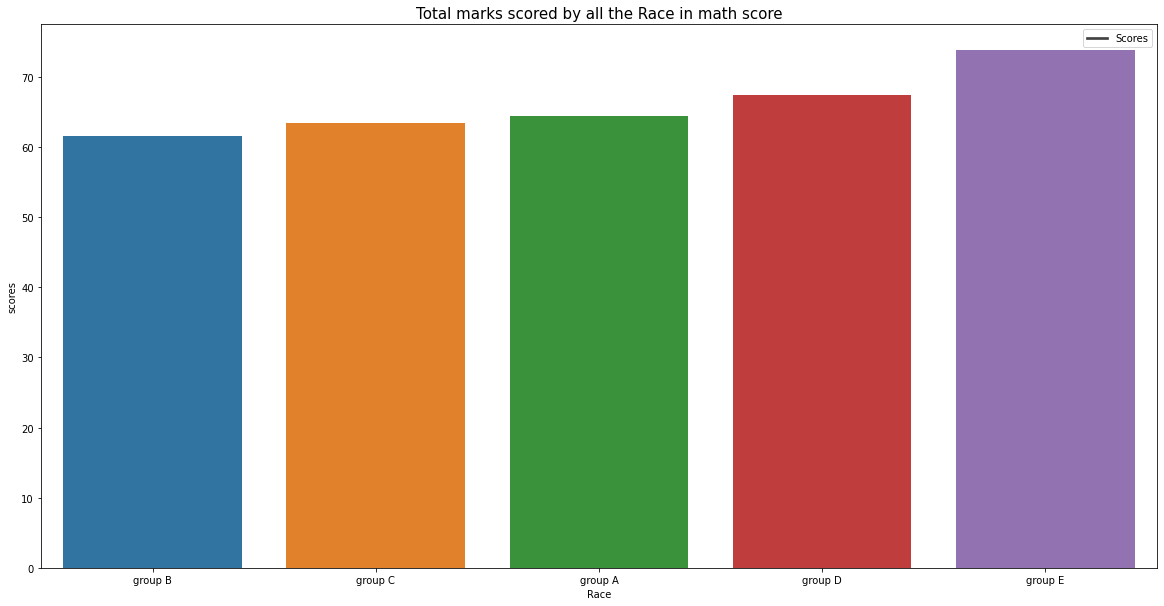

In [25]:
def plotRaceScores(ls: str) -> None:
    plt.figure(figsize=(20, 10))
    sns.barplot(x=data_new.race.unique(), y=data_new.groupby("race")[ls].mean(), data=data_new)
    plt.legend(["Scores"], loc="best")
    plt.xlabel("Race")
    plt.ylabel("scores")
    plt.title(f"Total marks scored by all the Race in {ls}", fontsize=15)

plotRaceScores("math score")

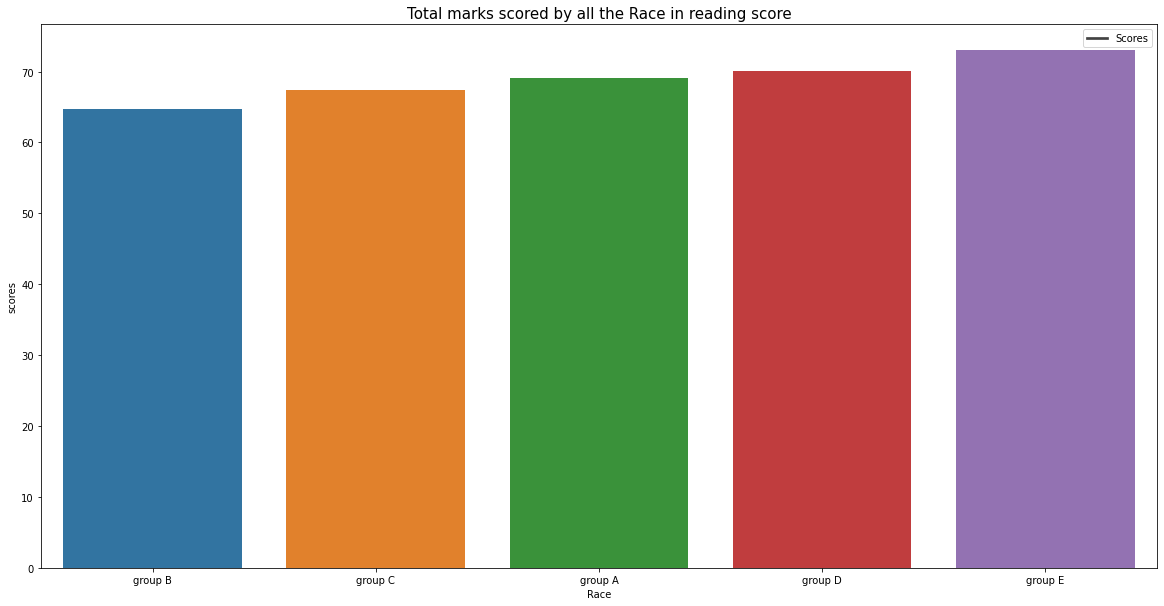

In [26]:
plotRaceScores("reading score")

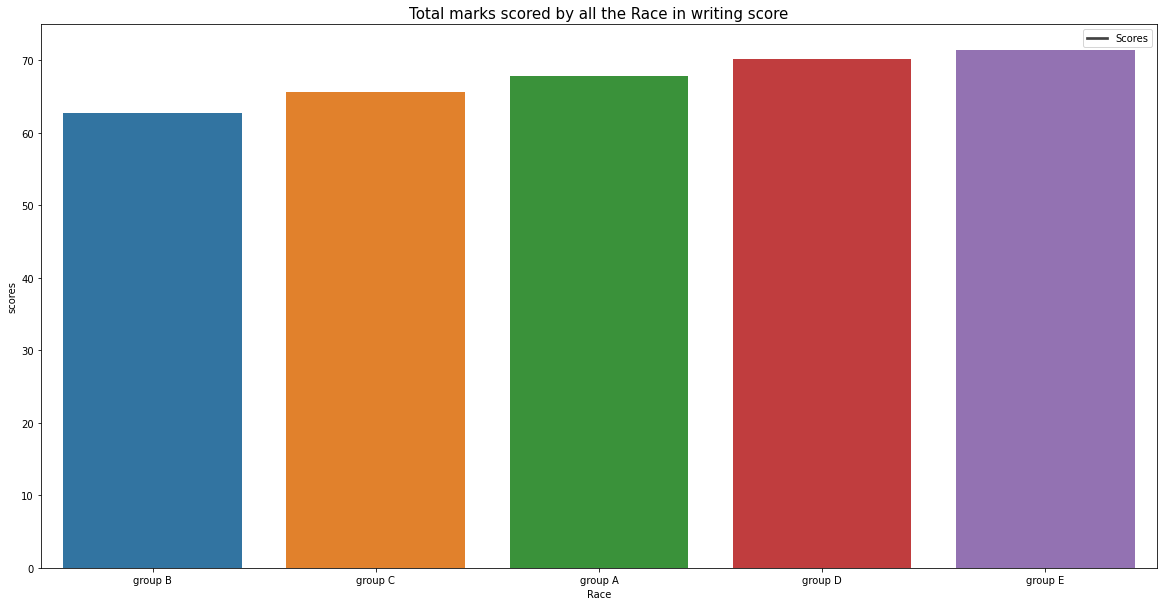

In [27]:
plotRaceScores("writing score")

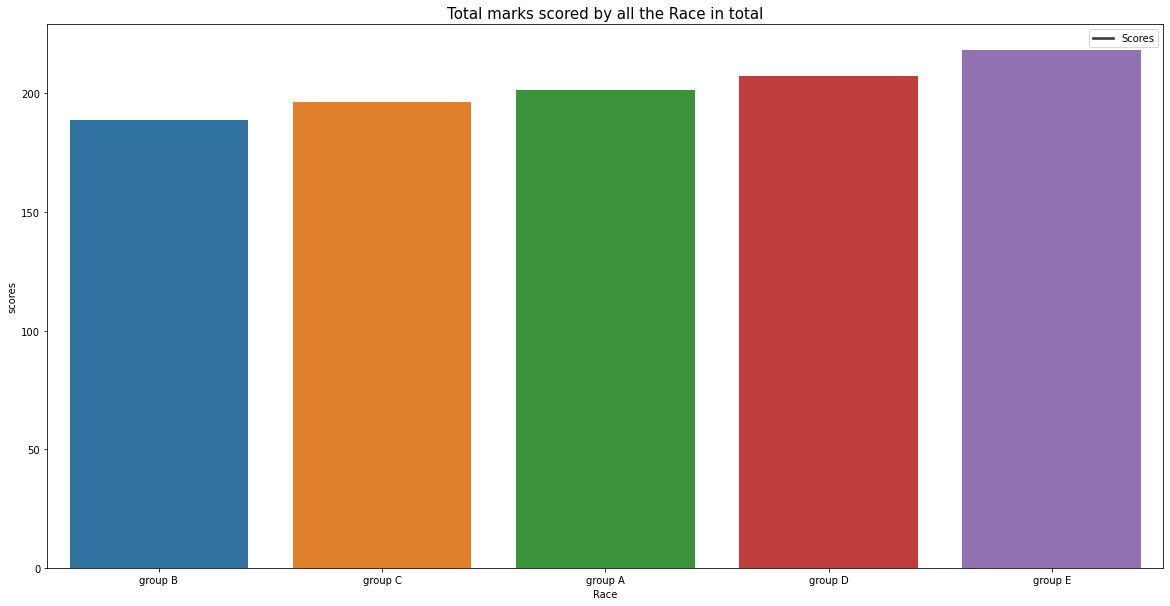

In [28]:
plotRaceScores("total")

#### What are the factors affecting the results


Text(0.5, 1.0, 'Total Marks gender wise')

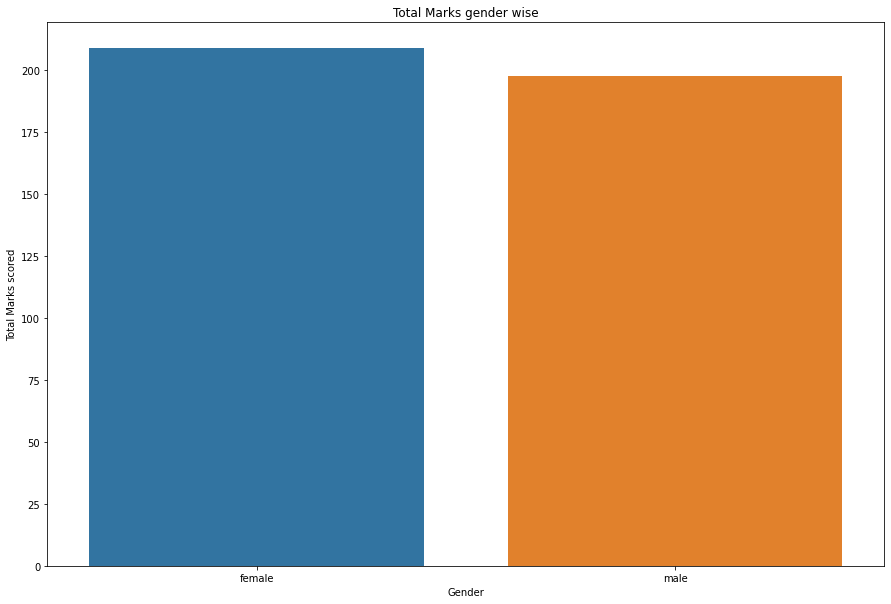

In [29]:
# analysing all variables
plt.figure(figsize=(15, 10))
sns.barplot(x=data["gender"].unique(), y = data.groupby("gender")["total"].mean().to_list(), data=data)
plt.xlabel("Gender")
plt.ylabel("Total Marks scored")
plt.title("Total Marks gender wise")

### Trying distplot on Total Column

<AxesSubplot:xlabel='total', ylabel='Density'>

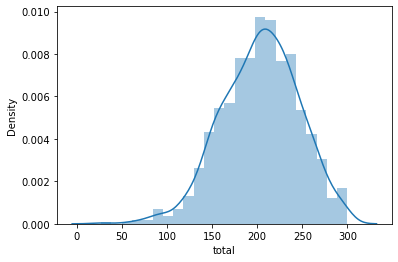

In [30]:
sns.distplot(a=data["total"])

### Trying Voilin plot on Marks column

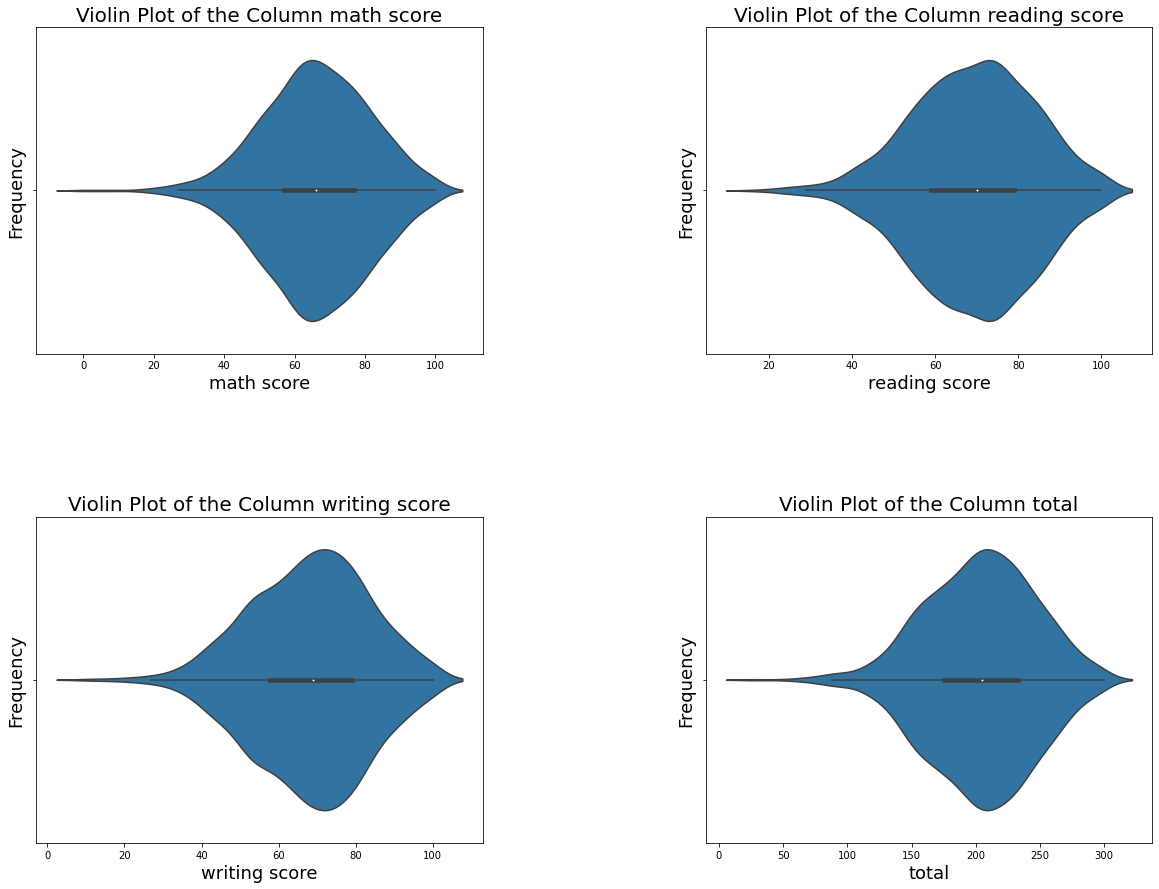

In [31]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5, wspace=0.5)


for index, column in enumerate([col for col in data.columns if data[col].dtype != "object"]):
    plt.subplot(2, 2, index + 1)
    sns.violinplot(x=data[column], data=data)    
    plt.xlabel(column,fontsize=18)
    plt.ylabel("Frequency", fontsize=18)
    plt.title(f"Violin Plot of the Column {column}", fontsize=20)

In [32]:
# keeping 75 percentile as the boundary of the criteria for merit

merit_score = numpy.percentile(data["total"].to_list(), 75)
data_new["is_merit"] = numpy.where(data_new["total"] > merit_score, "Y", "N")
data_new.head()


,gender,race,parents edu,lunch,prepare,math score,reading score,writing score,total,Math_PassStatus,Reading_Overall,Writing_Overall,Overall_PassStatus,is_merit
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P,N
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P,Y
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P,Y
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P,P,P,P,N
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P,N


Question 1: Finding what practices should one follow to score above merit

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

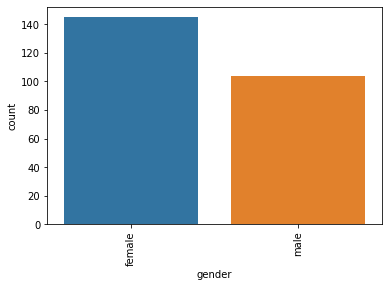

In [33]:
sns.countplot(x=data_new.loc[:, "gender"][data_new["is_merit"] == "Y"], data=data_new)
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

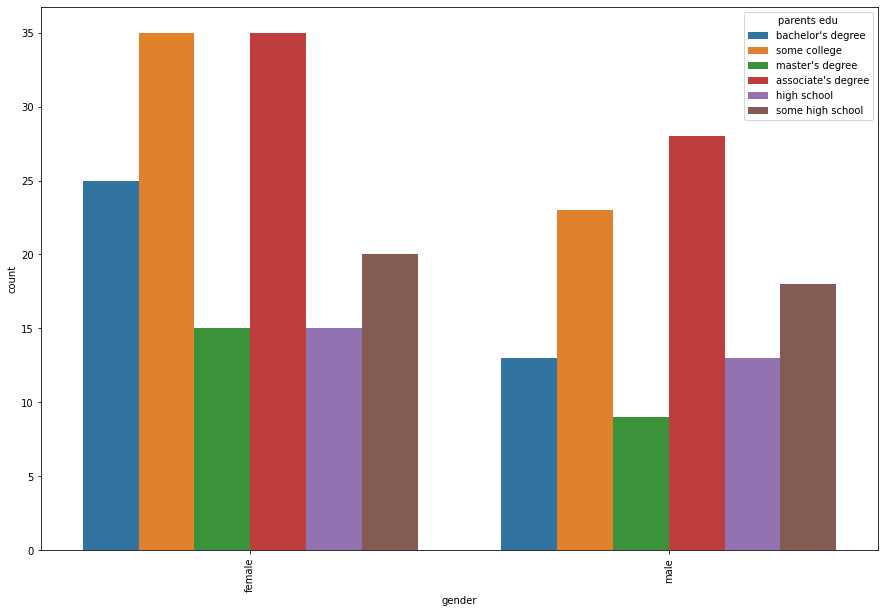

In [34]:
plt.figure(figsize=(15, 10))

sns.countplot(x=data_new.loc[:, "gender"][data_new["is_merit"] == "Y"], data=data_new, hue="parents edu")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

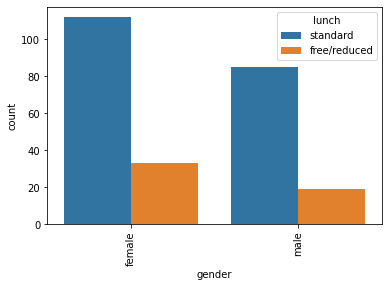

In [35]:
sns.countplot(x=data_new.loc[:, "gender"][data_new["is_merit"] == "Y"], data=data_new, hue="lunch")
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

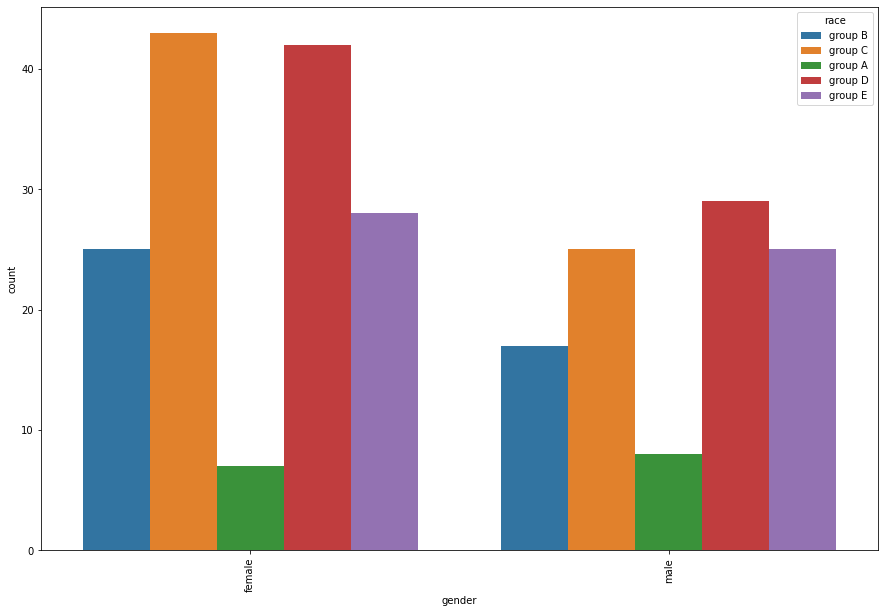

In [36]:
plt.figure(figsize=(15, 10))

sns.countplot(x=data_new.loc[:, "gender"][data_new["is_merit"] == "Y"], data=data_new, hue="race")
plt.xticks(rotation=90)

In [37]:
# students who has failed, keeping passing marks to 35%

data_new["result"] = numpy.where(data_new["total"] > numpy.percentile(data_new["total"], 35), "P", "F")


In [38]:
# finding strong subjects of students who has failed

def strong_sub(col):
    max_ = max(col["math score"], col["writing score"], col["reading score"])

    return "/".join([c.split()[0] for c in ["math score", "writing score", "reading score"] if col[c] == max_])

data_new["strong sub"] = data_new.apply(strong_sub, axis=1)

In [39]:
def weak_sub(col):
    min_ = min(col["math score"], col["writing score"], col["reading score"])

    return "/".join([c.split()[0] for c in ["math score", "writing score", "reading score"] if col[c] == min_])

data_new["weak sub"] = data_new.apply(weak_sub, axis=1)

In [40]:
data_new.head()

,gender,race,parents edu,lunch,prepare,math score,reading score,writing score,total,Math_PassStatus,Reading_Overall,Writing_Overall,Overall_PassStatus,is_merit,result,strong sub,weak sub
0,female,group B,bachelor's degree,standard,none,72,72,74,218,P,P,P,P,N,P,writing,math/reading
1,female,group C,some college,standard,completed,69,90,88,247,P,P,P,P,Y,P,reading,math
2,female,group B,master's degree,standard,none,90,95,93,278,P,P,P,P,Y,P,reading,math
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,P,P,P,P,N,F,reading,writing
4,male,group C,some college,standard,none,76,78,75,229,P,P,P,P,N,P,reading,writing


### Weak Subjects of students **before** and **after** taking Test preparation Course

Text(0.5, 1.0, 'After Completion of Course(Failed)')

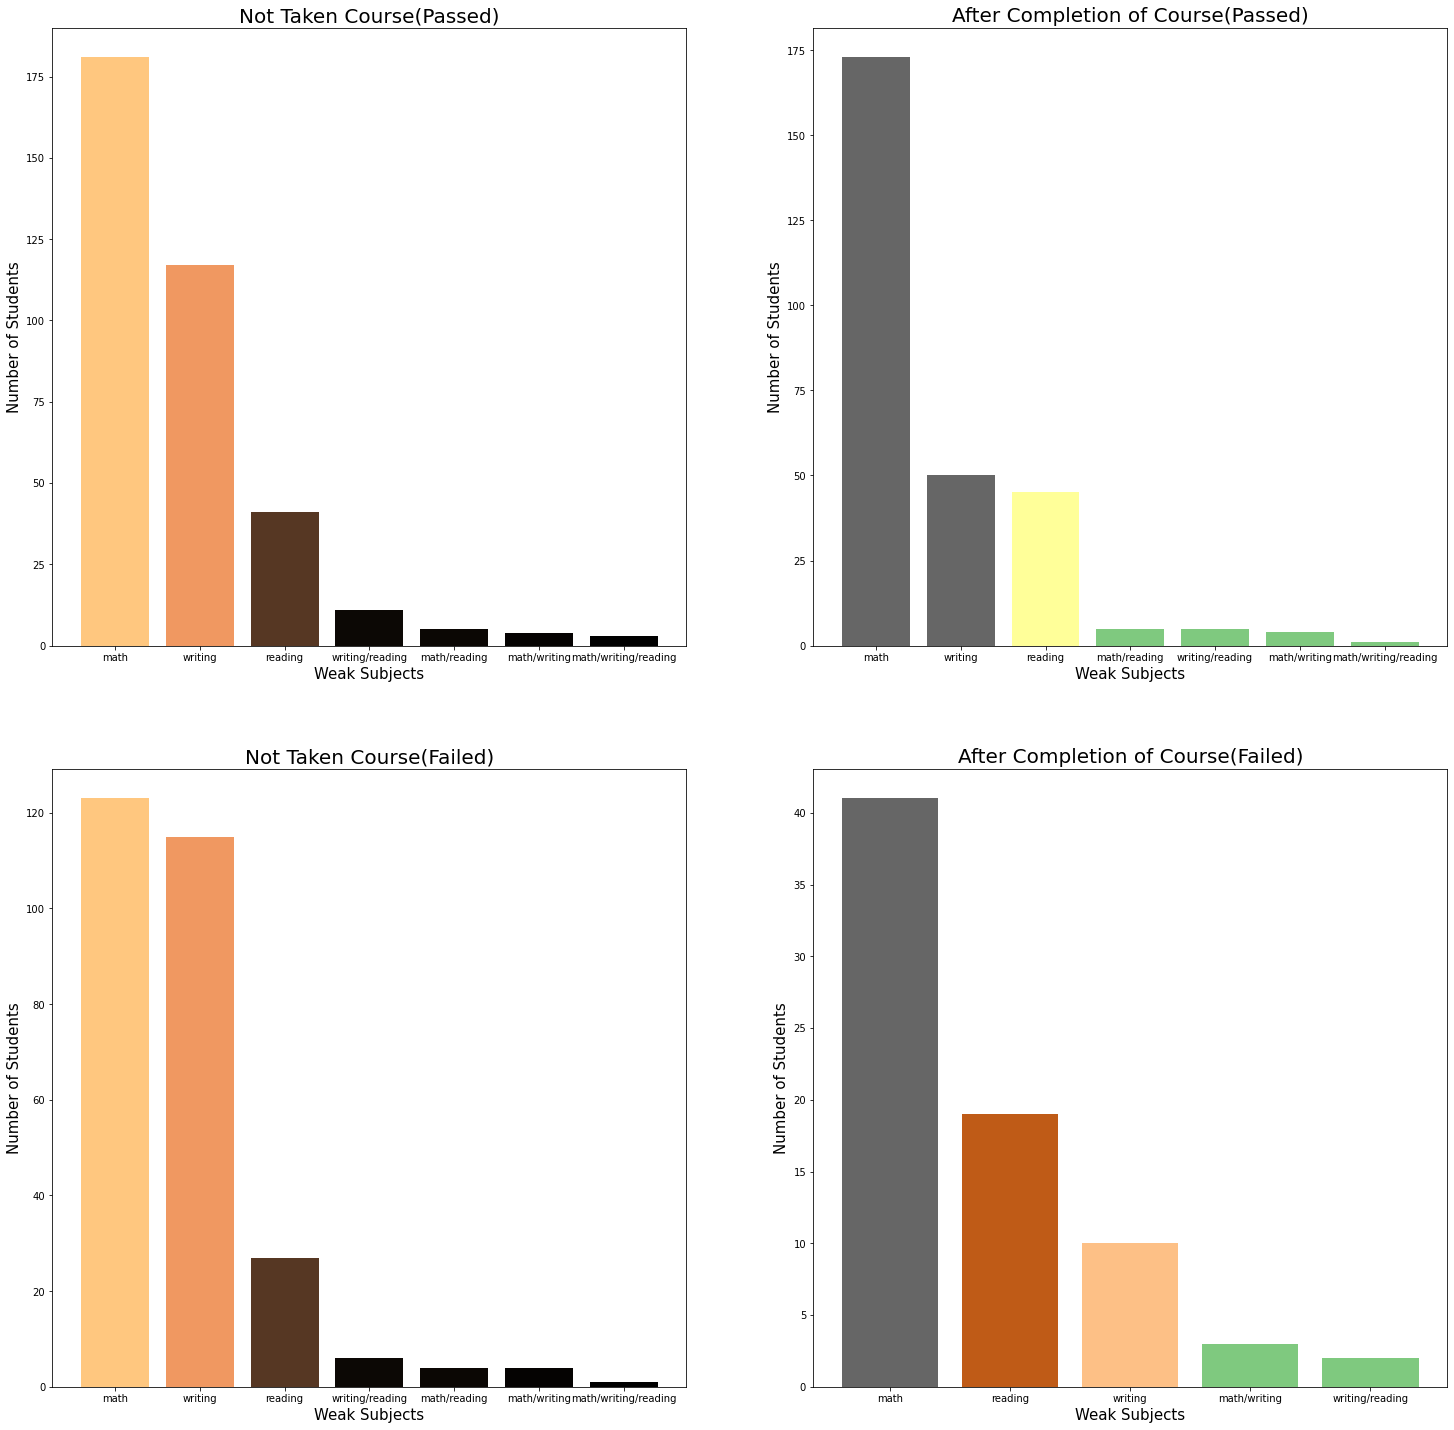

In [41]:
rescale = lambda y: (y - numpy.min(y)) / (numpy.max(y) - numpy.min(y))

# finding out the weak subjects of all the students

plt.figure(figsize=(25, 25))

my_cmap = plt.get_cmap("copper")

plt.subplot(2,2,1)
plt.bar(data_new.loc[(data_new["result"] == "P") & (data_new["prepare"] == "none")]["weak sub"].value_counts().index,data_new.loc[(data_new["result"] == "P") & (data_new["prepare"] == "none")]["weak sub"].value_counts(), color=my_cmap(rescale(data_new.loc[data_new["result"] == "F"]["weak sub"].value_counts().to_list())))
plt.xlabel("Weak Subjects", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.title("Not Taken Course(Passed)", fontsize=20)

plt.subplot(2,2,3)
plt.bar(data_new.loc[(data_new["result"] == "F")  & (data_new["prepare"] == "none")]["weak sub"].value_counts().index,data_new.loc[(data_new["result"] == "F") & (data_new["prepare"] == "none")]["weak sub"].value_counts(), color=my_cmap(rescale(data_new.loc[data_new["result"] == "F"]["weak sub"].value_counts().to_list())))
plt.xlabel("Weak Subjects", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.title("Not Taken Course(Failed)", fontsize=20)

my_cmap = plt.get_cmap("Accent")

plt.subplot(2, 2, 2)
plt.bar(data_new.loc[(data_new["result"] == "P") & (data_new["prepare"] == "completed")]["weak sub"].value_counts().index,data_new.loc[(data_new["result"] == "P") & (data_new["prepare"] == "completed")]["weak sub"].value_counts(), color=my_cmap(rescale(data_new.loc[data_new["result"] == "F"]["strong sub"].value_counts().to_list())))
plt.xlabel("Weak Subjects", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.title("After Completion of Course(Passed)", fontsize=20)


plt.subplot(2, 2, 4)
plt.bar(data_new.loc[(data_new["result"] == "F") & (data_new["prepare"] == "completed")]["weak sub"].value_counts().index,data_new.loc[(data_new["result"] == "F") & (data_new["prepare"] == "completed")]["weak sub"].value_counts(), color=my_cmap(rescale(data_new.loc[data_new["result"] == "F"]["weak sub"].value_counts().to_list())))
plt.xlabel("Weak Subjects", fontsize=15)
plt.ylabel("Number of Students", fontsize=15)
plt.title("After Completion of Course(Failed)", fontsize=20)